In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1XsBETpoL5EM5B85Ak2QaaQQdYNFOunuE' -O 'Roasted2Coffe.xlsx'

--2023-01-25 05:50:49--  https://drive.google.com/uc?export=download&id=1XsBETpoL5EM5B85Ak2QaaQQdYNFOunuE
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.100, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/scrp3m1l0h178b01rv2jkovmtaavcqid/1674625800000/16540799270413311004/*/1XsBETpoL5EM5B85Ak2QaaQQdYNFOunuE?e=download&uuid=8cd60e9d-8943-4784-b50e-5c72ee13a1ff [following]
--2023-01-25 05:50:50--  https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/scrp3m1l0h178b01rv2jkovmtaavcqid/1674625800000/16540799270413311004/*/1XsBETpoL5EM5B85Ak2QaaQQdYNFOunuE?e=download&uuid=8cd60e9d-8943-4784-b50e-5c72ee13a1ff
Resolving doc-0k-4k-docs.googleusercontent.com (doc-0k-4k-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1k2r0DfyGJaRxVY2bVREqcpV7ttSs8CSB' -O 'Roasted.xlsx'

--2023-01-25 05:50:51--  https://drive.google.com/uc?export=download&id=1k2r0DfyGJaRxVY2bVREqcpV7ttSs8CSB
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.100, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6kemai2nauqsv9h57ibb78mf5cd9bnsb/1674625800000/10842872470776738560/*/1k2r0DfyGJaRxVY2bVREqcpV7ttSs8CSB?e=download&uuid=1aaac560-af0b-450a-ba02-fd7a0f7ad8b3 [following]
--2023-01-25 05:50:51--  https://doc-14-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6kemai2nauqsv9h57ibb78mf5cd9bnsb/1674625800000/10842872470776738560/*/1k2r0DfyGJaRxVY2bVREqcpV7ttSs8CSB?e=download&uuid=1aaac560-af0b-450a-ba02-fd7a0f7ad8b3
Resolving doc-14-7k-docs.googleusercontent.com (doc-14-7k-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1kuh0fUn7RFsEOI8BfAjaSat0MOdl_9Zr' -O 'RoastedCoffee.xlsx'

--2023-01-25 05:50:52--  https://drive.google.com/uc?export=download&id=1kuh0fUn7RFsEOI8BfAjaSat0MOdl_9Zr
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.100, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/blbckbaroa82j9a9jvmrt9ht1ljb7upb/1674625800000/10842872470776738560/*/1kuh0fUn7RFsEOI8BfAjaSat0MOdl_9Zr?e=download&uuid=1070356f-2f2a-4a01-8412-e3a3f231b955 [following]
--2023-01-25 05:50:53--  https://doc-0c-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/blbckbaroa82j9a9jvmrt9ht1ljb7upb/1674625800000/10842872470776738560/*/1kuh0fUn7RFsEOI8BfAjaSat0MOdl_9Zr?e=download&uuid=1070356f-2f2a-4a01-8412-e3a3f231b955
Resolving doc-0c-7k-docs.googleusercontent.com (doc-0c-7k-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:

In [ ]:
#Loading Dataset
data = pd.read_excel("Roasted2Coffe.xlsx")
data

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,MQ135,MQ136,Label
0,413,408,476,193,464,305,230,157,581,0
1,414,402,476,192,467,304,226,143,581,0
2,415,401,477,192,469,306,227,145,582,0
3,416,404,478,192,472,305,229,145,582,0
4,417,406,479,192,475,305,231,149,582,0
...,...,...,...,...,...,...,...,...,...,...
895,223,497,485,116,453,430,197,594,547,2
896,228,493,487,122,456,290,203,236,553,2
897,221,501,492,116,453,344,201,189,517,2
898,222,501,483,115,456,231,199,220,521,2


In [ ]:
data['Label']=data['Label'].replace([0,1,2],['Light','Medium','Dark'])

In [ ]:
data

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,MQ135,MQ136,Label
0,413,408,476,193,464,305,230,157,581,Light
1,414,402,476,192,467,304,226,143,581,Light
2,415,401,477,192,469,306,227,145,582,Light
3,416,404,478,192,472,305,229,145,582,Light
4,417,406,479,192,475,305,231,149,582,Light
...,...,...,...,...,...,...,...,...,...,...
895,223,497,485,116,453,430,197,594,547,Dark
896,228,493,487,122,456,290,203,236,553,Dark
897,221,501,492,116,453,344,201,189,517,Dark
898,222,501,483,115,456,231,199,220,521,Dark


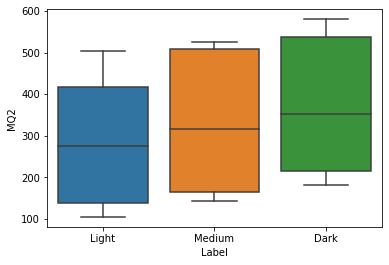

In [ ]:
sns.boxplot(x='Label', y='MQ2', data=data)

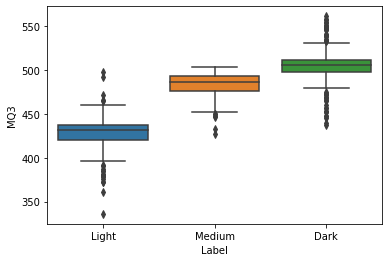

In [ ]:
sns.boxplot(x='Label', y='MQ3', data=data)

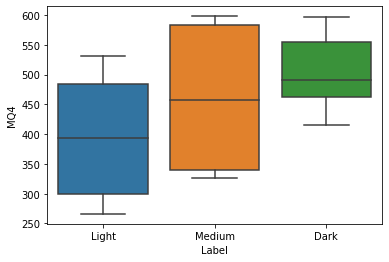

In [ ]:
sns.boxplot(x='Label', y='MQ4', data=data)

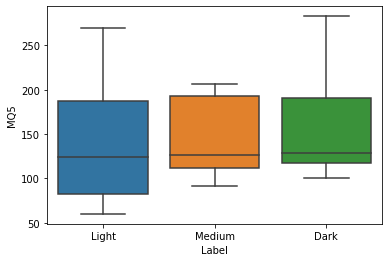

In [ ]:
sns.boxplot(x='Label', y='MQ5', data=data)

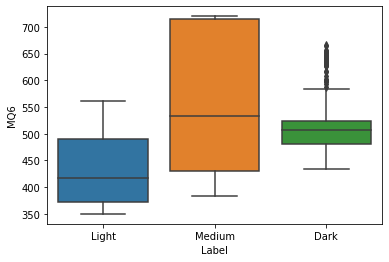

In [ ]:
sns.boxplot(x='Label', y='MQ6', data=data)

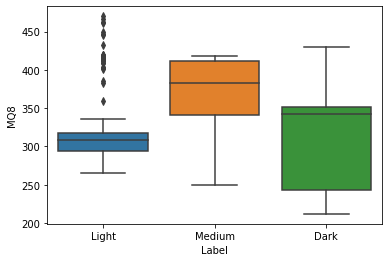

In [ ]:
sns.boxplot(x='Label', y='MQ8', data=data)

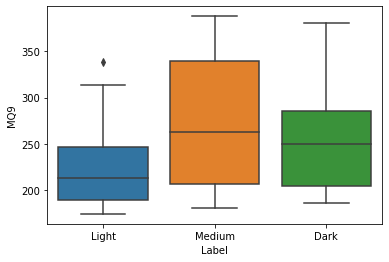

In [ ]:
sns.boxplot(x='Label', y='MQ9', data=data)

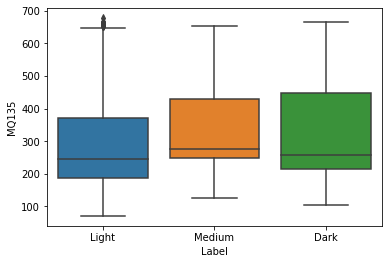

In [ ]:
sns.boxplot(x='Label', y='MQ135', data=data)

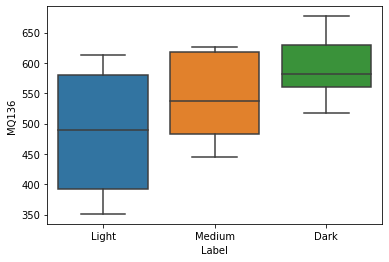

In [ ]:
sns.boxplot(x='Label', y='MQ136', data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f201d2a3af0>,
      dtype=object)

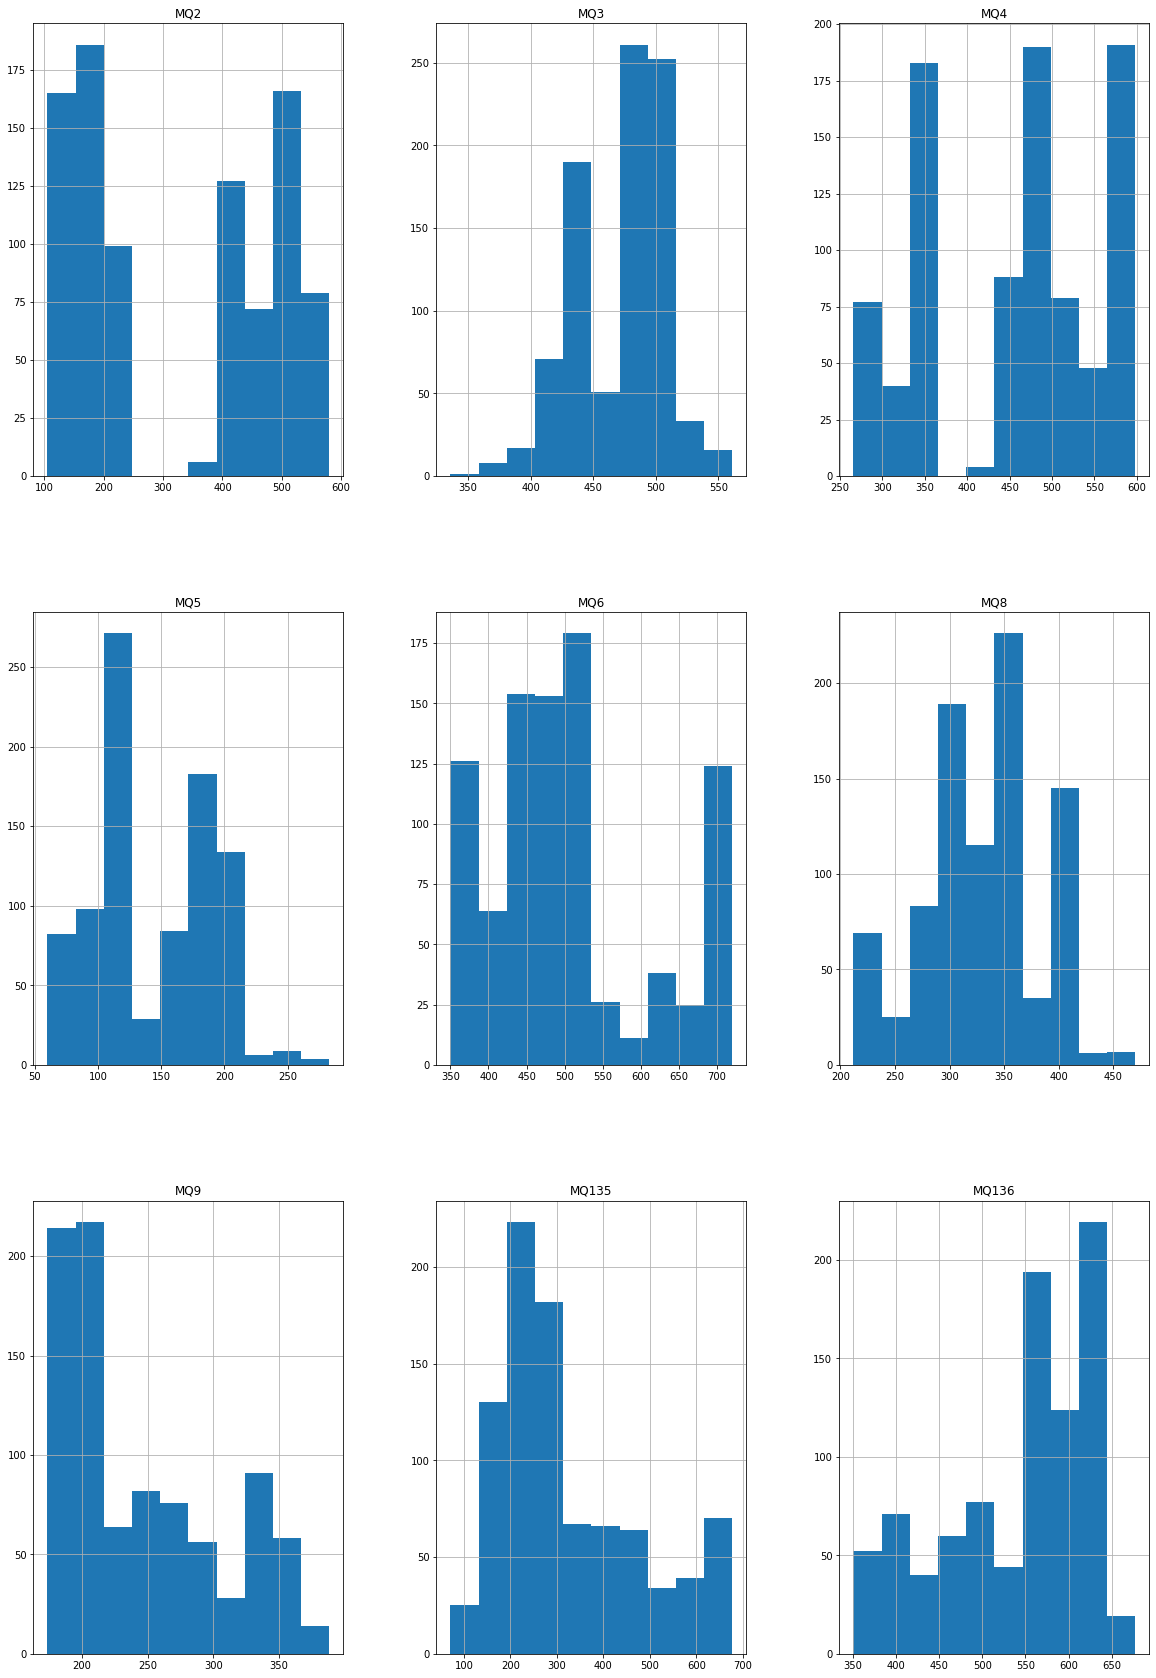

In [ ]:
data.hist(figsize=(20,30))

In [ ]:
X=data.drop('Label', axis=1)
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values
Y

array(['Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Light', 'Light', 'Light', 'Light', 'Light', 'Light',
       'Light', 'Lig

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

In [ ]:
dummy_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
#Splitting dataset into training and testing dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,dummy_y,test_size=0.2,random_state=0)

#Performing Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=12,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=3,activation="softmax"))
#Compiling ANN
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(X_train,Y_train,batch_size=64,epochs = 150)

Epoch 1/150
12/12 [==============================] - 1s 2ms/step - loss: 77.9536 - accuracy: 0.3333
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 43.3806 - accuracy: 0.3569
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 18.4644 - accuracy: 0.4472
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 14.6571 - accuracy: 0.4056
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 9.8447 - accuracy: 0.4333
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 6.6049 - accuracy: 0.3764
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 5.0996 - accuracy: 0.4764
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 4.1744 - accuracy: 0.4931
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 3.7703 - accuracy: 0.5097
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 3.3244 - accuracy: 0.5306
Epoch

In [ ]:
y_pred = ann.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

6/6 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 85.0


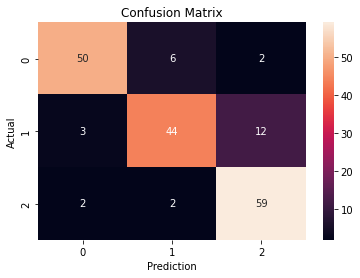

In [ ]:
cm = confusion_matrix(test, pred)
sns.heatmap(cm, annot=True, fmt='d') # annot=True : memunculkan angka pada heatmap, fmt='d' : mengubah scientific notation menjadi digit saja
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()